In [1]:
from glob import glob

In [2]:
import os
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
import hashlib
import ipynbname
# Function to generate a consistent hash number for a given file name
# _, _, experiment_name = nb_fname.rpartition('_')
experiment_name = "nursing_home"

def generate_hash_number(file_name):
    # Create an MD5 hash object
    hash_obj = hashlib.md5()
    
    # Update the hash object with the file name, encoded to bytes
    hash_obj.update(file_name.encode())

    # Convert the hash to an integer
    hash_number = int(hash_obj.hexdigest(), 16)

    # Ensure the hash number is within the range 0 to 2**32 - 1
    return hash_number % (2**32)

# Generate seed numbers based on file names
experiment_seed = generate_hash_number(experiment_name)
seed = experiment_seed
print(experiment_name, experiment_seed) # 1786247645

# Set the seed for reproducibility
np.random.seed(experiment_seed)

# Generate 5 random integers using the full range of 32-bit integers
# 0 and 2**32 - 1
random_integers_numpy = np.random.randint(low=0, high=2**31 - 1, size=5)

# Convert the NumPy array to a list
random_integers_list = random_integers_numpy.tolist()

# Print the list of random integers
print(random_integers_list)

nursing_home 127573839
[315491657, 135304577, 1572185508, 1029933563, 1950160822]


In [4]:
os.sep

'\\'

In [5]:
df_path = glob(f'..{os.sep}data{os.sep}*clinical_microbiome_df*')[0]
df_path

'..\\data\\clinical_microbiome_df.csv'

In [6]:
import pandas as pd

In [7]:
clinical_microbiome_df = pd.read_csv(df_path)

clinical_microbiome_df

,Sample ID,study_id,day,Date Sample,age,age_cat,male,abx6mo,hopsn,malnutrition_indicator_sco,...,Lactobacillus iners,Citrobacter werkmanii,Bifidobacterium angulatum,Fructilactobacillus fructivorans,Schaalia meyeri,Ndongobacter massiliensis,Actinomyces radicidentis,Candida tropicalis,Lachnospiraceae bacterium 10 1,GGB3297 SGB4356
0,DC070,CH1-001,0,2016-07-13,94.0,3.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DC071,CH1-002,0,2016-07-15,93.0,3.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DC013,CH1-003,0,2016-07-12,68.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DC019,CH1-003,18,2016-07-30,68.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DC014,CH1-003,20,2016-08-01,68.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,FB205,CH3-011,4,2018-01-12,74.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
511,FB202,CH3-011,6,2018-01-14,74.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512,FB208,CH3-011,8,2018-01-16,74.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,FB198,CH3-011,10,2018-01-18,74.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
clinical_microbiome_df['Alzheimers'].value_counts(), clinical_microbiome_df['Alzheimers'].value_counts(normalize=True)

(Alzheimers
 0.0    405
 1.0    110
 Name: count, dtype: int64,
 Alzheimers
 0.0    0.786408
 1.0    0.213592
 Name: proportion, dtype: float64)

In [63]:
# Step 1: Group by `study_id` and compute the Alzheimers label for each group
study_labels = clinical_microbiome_df.groupby('study_id')['Alzheimers'].max().reset_index()

# Step 2: Split `study_id` into train and test sets, stratified by Alzheimers label
train_ids, test_ids = train_test_split(
    study_labels['study_id'],
    test_size=0.24,  # 24% of the data for testing
    stratify=study_labels['Alzheimers'],  # Stratify by Alzheimers label
    random_state=seed  # Ensure reproducibility
)

# Step 2: Split train_ids into train_ids and valid_ids, stratified by Alzheimer's label
train_ids, valid_ids = train_test_split(
    train_ids,  # Use the train_ids from Step 1
    test_size=0.50,   # 28% of the training data for validation
    stratify=study_labels.loc[study_labels['study_id'].isin(train_ids), 'Alzheimers'],  # Stratify by Alzheimers label
    random_state=seed  # Ensure reproducibility
)

print("Train ID counts:", len(train_ids), "| Valid ID counts:", len(valid_ids), "| Test ID counts:", len(test_ids))

Train ID counts: 63 | Valid ID counts: 63 | Test ID counts: 40


In [64]:
clinical_microbiome_tr = clinical_microbiome_df[clinical_microbiome_df['study_id'].isin(train_ids)]
print(clinical_microbiome_tr['Alzheimers'].value_counts())
print(clinical_microbiome_tr['Alzheimers'].value_counts(normalize=True))
clinical_microbiome_tr

Alzheimers
0.0    158
1.0     49
Name: count, dtype: int64
Alzheimers
0.0    0.763285
1.0    0.236715
Name: proportion, dtype: float64


,Sample ID,study_id,day,Date Sample,age,age_cat,male,abx6mo,hopsn,malnutrition_indicator_sco,...,Lactobacillus iners,Citrobacter werkmanii,Bifidobacterium angulatum,Fructilactobacillus fructivorans,Schaalia meyeri,Ndongobacter massiliensis,Actinomyces radicidentis,Candida tropicalis,Lachnospiraceae bacterium 10 1,GGB3297 SGB4356
2,DC013,CH1-003,0,2016-07-12,68.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
3,DC019,CH1-003,18,2016-07-30,68.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4,DC014,CH1-003,20,2016-08-01,68.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
5,DC015,CH1-003,23,2016-08-04,68.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
6,DC016,CH1-003,26,2016-08-07,68.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,FB446,CH1BR-11,11,2019-01-19,80.0,2.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
487,FB336,CH1BR-15,0,2018-11-09,98.0,4.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
488,FB442,CH1BR-15,32,2018-12-11,98.0,4.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
489,FB432,CH2-01,0,2018-12-05,95.0,4.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00052,0.0,0.0


In [65]:
clinical_microbiome_va = clinical_microbiome_df[clinical_microbiome_df['study_id'].isin(valid_ids)]
print(clinical_microbiome_va['Alzheimers'].value_counts())
print(clinical_microbiome_va['Alzheimers'].value_counts(normalize=True))
clinical_microbiome_va

Alzheimers
0.0    154
1.0     31
Name: count, dtype: int64
Alzheimers
0.0    0.832432
1.0    0.167568
Name: proportion, dtype: float64


,Sample ID,study_id,day,Date Sample,age,age_cat,male,abx6mo,hopsn,malnutrition_indicator_sco,...,Lactobacillus iners,Citrobacter werkmanii,Bifidobacterium angulatum,Fructilactobacillus fructivorans,Schaalia meyeri,Ndongobacter massiliensis,Actinomyces radicidentis,Candida tropicalis,Lachnospiraceae bacterium 10 1,GGB3297 SGB4356
16,DC076,CH1-005,0,2016-07-15,83.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,DC077,CH1-005,30,2016-08-14,83.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,DC079,CH1-005,90,2016-10-13,83.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,FB002,CH1-005,220,2017-02-20,83.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,DC024,CH1-009,0,2016-07-31,90.0,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,FB184,CH3-011,2,2018-01-10,74.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
510,FB205,CH3-011,4,2018-01-12,74.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
511,FB202,CH3-011,6,2018-01-14,74.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512,FB208,CH3-011,8,2018-01-16,74.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
clinical_microbiome_tt = clinical_microbiome_df[clinical_microbiome_df['study_id'].isin(test_ids)]
print(clinical_microbiome_tt['Alzheimers'].value_counts())
print(clinical_microbiome_tt['Alzheimers'].value_counts(normalize=True))
clinical_microbiome_tt

Alzheimers
0.0    93
1.0    30
Name: count, dtype: int64
Alzheimers
0.0    0.756098
1.0    0.243902
Name: proportion, dtype: float64


,Sample ID,study_id,day,Date Sample,age,age_cat,male,abx6mo,hopsn,malnutrition_indicator_sco,...,Lactobacillus iners,Citrobacter werkmanii,Bifidobacterium angulatum,Fructilactobacillus fructivorans,Schaalia meyeri,Ndongobacter massiliensis,Actinomyces radicidentis,Candida tropicalis,Lachnospiraceae bacterium 10 1,GGB3297 SGB4356
0,DC070,CH1-001,0,2016-07-13,94.0,3.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DC071,CH1-002,0,2016-07-15,93.0,3.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,DC088,CH1-020,0,2016-07-31,90.0,3.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,DC089,CH1-020,30,2016-08-30,90.0,3.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,DC090,CH1-020,60,2016-09-29,90.0,3.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,DC041,CH3-004,18,2016-08-15,90.0,3.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,DC042,CH3-004,30,2016-08-27,90.0,3.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500,DC043,CH3-004,60,2016-09-26,90.0,3.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,DC044,CH3-004,90,2016-10-26,90.0,3.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
clinical_microbiome_df['Alzheimers'].value_counts()

Alzheimers
0.0    405
1.0    110
Name: count, dtype: int64

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [69]:
# Split features and target
from copy import deepcopy

X_train = deepcopy(clinical_microbiome_tr.drop(columns=['Sample ID', 'study_id', 'Alzheimers', 'Date Sample']))
y_train = deepcopy(clinical_microbiome_tr['Alzheimers'])

X_valid = deepcopy(clinical_microbiome_va.drop(columns=['Sample ID', 'study_id', 'Alzheimers', 'Date Sample']))
y_valid = deepcopy(clinical_microbiome_va['Alzheimers'])

X_test = deepcopy(clinical_microbiome_tt.drop(columns=['Sample ID', 'study_id', 'Alzheimers', 'Date Sample']))
y_test = deepcopy(clinical_microbiome_tt['Alzheimers'])

In [70]:
X_train

,day,age,age_cat,male,abx6mo,hopsn,malnutrition_indicator_sco,clinical_frailty_scale,polypharm5,PPI,...,Lactobacillus iners,Citrobacter werkmanii,Bifidobacterium angulatum,Fructilactobacillus fructivorans,Schaalia meyeri,Ndongobacter massiliensis,Actinomyces radicidentis,Candida tropicalis,Lachnospiraceae bacterium 10 1,GGB3297 SGB4356
2,0,68.0,1.0,0.0,0.0,1.0,1.0,5.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
3,18,68.0,1.0,0.0,0.0,1.0,1.0,5.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4,20,68.0,1.0,0.0,0.0,1.0,1.0,5.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
5,23,68.0,1.0,0.0,0.0,1.0,1.0,5.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
6,26,68.0,1.0,0.0,0.0,1.0,1.0,5.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,11,80.0,2.0,0.0,0.0,1.0,2.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
487,0,98.0,4.0,0.0,0.0,0.0,3.0,9.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
488,32,98.0,4.0,0.0,0.0,0.0,3.0,9.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
489,0,95.0,4.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00052,0.0,0.0


In [71]:
from sklearn.impute import SimpleImputer

# Impute missing values in the training and testing data
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_valid = imputer.fit_transform(X_valid)
X_test = imputer.transform(X_test)

[I 2024-11-19 13:18:25,924] A new study created in memory with name: no-name-71e2349b-21c1-44f1-b910-fc83736441a7
[I 2024-11-19 13:18:26,055] Trial 0 finished with value: 0.3956043956043956 and parameters: {}. Best is trial 0 with value: 0.3956043956043956.



Test Metrics:
ROC AUC: 0.6007168458781362
Accuracy: 0.6829268292682927
F1 Score: 0.3157894736842105
Confusion Matrix:
 [[75 18]
 [21  9]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.81      0.79        93
    Positive       0.33      0.30      0.32        30

    accuracy                           0.68       123
   macro avg       0.56      0.55      0.55       123
weighted avg       0.67      0.68      0.68       123



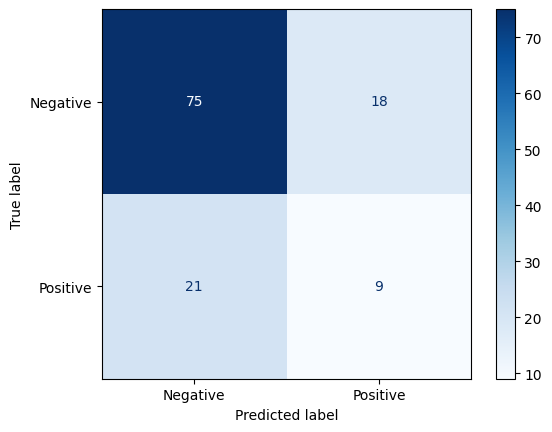

In [79]:
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, confusion_matrix

# Set random seed for reproducibility
seed = experiment_seed

# Define the objective function for Optuna
def objective(trial):
    # Since LinearRegression has no hyperparameters, we directly fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Validate on the validation set
    y_valid_pred = model.predict(X_valid)
    y_valid_pred_binary = (y_valid_pred >= 0.5).astype(int)
    
    # Calculate F1 score on the validation set
    f1 = f1_score(y_valid, y_valid_pred_binary)
    return f1  # Optuna will maximize this score

# Create a study to optimize the F1 score
study = optuna.create_study(direction="maximize", sampler=TPESampler(seed=seed))
study.optimize(objective, n_trials=1)  # Only one trial since no hyperparameters exist

# Evaluate the model on the test set
best_model = LinearRegression()
best_model.fit(X_train, y_train)

y_test_pred = best_model.predict(X_test)
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)

# Test metrics
auc = roc_auc_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred_binary)
f1 = f1_score(y_test, y_test_pred_binary)
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)

print("\nTest Metrics:")
print("ROC AUC:", auc)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Generate a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")

# Generate a classification report
report = classification_report(y_test, y_test_pred_binary, target_names=["Negative", "Positive"])
print("\nClassification Report:")
print(report)

[I 2024-11-19 13:18:11,511] A new study created in memory with name: no-name-91837b17-203c-4078-856f-1d6235cb48bc
[I 2024-11-19 13:18:11,516] Trial 0 finished with value: 0.0 and parameters: {'C': 3.267329184694649e-05}. Best is trial 0 with value: 0.0.
[I 2024-11-19 13:18:11,522] Trial 1 finished with value: 0.05 and parameters: {'C': 0.003650654662771198}. Best is trial 1 with value: 0.05.
[I 2024-11-19 13:18:11,527] Trial 2 finished with value: 0.047619047619047616 and parameters: {'C': 0.015079967062887481}. Best is trial 1 with value: 0.05.
[I 2024-11-19 13:18:11,533] Trial 3 finished with value: 0.05 and parameters: {'C': 0.003674257097916091}. Best is trial 1 with value: 0.05.
[I 2024-11-19 13:18:11,536] Trial 4 finished with value: 0.0 and parameters: {'C': 5.2688788152525775e-05}. Best is trial 1 with value: 0.05.
[I 2024-11-19 13:18:11,542] Trial 5 finished with value: 0.13333333333333333 and parameters: {'C': 0.021301282614709382}. Best is trial 5 with value: 0.1333333333333

Best Parameters: {'C': 28.405892388523565}
Best Validation F1 Score: 0.4225352112676056

Test Metrics:
ROC AUC: 0.5849462365591398
Accuracy: 0.6585365853658537
F1 Score: 0.25
Confusion Matrix:
 [[74 19]
 [23  7]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.76      0.80      0.78        93
    Positive       0.27      0.23      0.25        30

    accuracy                           0.66       123
   macro avg       0.52      0.51      0.51       123
weighted avg       0.64      0.66      0.65       123



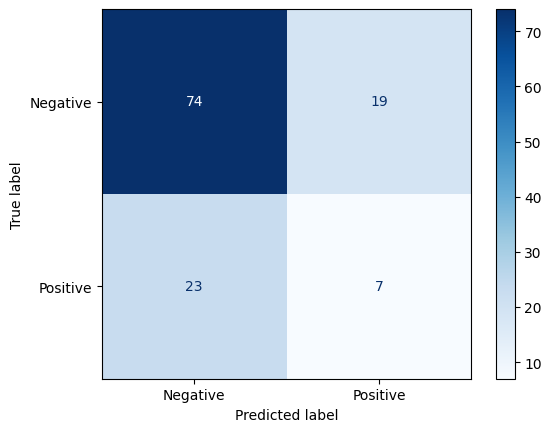

In [78]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, confusion_matrix

# Set random seed for reproducibility
seed = experiment_seed

# Define the objective function for Optuna
def objective(trial):
    # Suggest a regularization strength (C) for Logistic Regression
    C = trial.suggest_float("C", 1e-5, 1e2, log=True)
    
    # Initialize Logistic Regression with the suggested C
    model = LogisticRegression(C=C, solver='liblinear', max_iter=1000)
    model.fit(X_train, y_train)
    
    # Validate on the validation set
    y_valid_pred = model.predict_proba(X_valid)[:, 1]
    y_valid_pred_binary = (y_valid_pred >= 0.5).astype(int)
    
    # Calculate F1 score on the validation set
    f1 = f1_score(y_valid, y_valid_pred_binary)
    return f1  # Optuna will maximize this score

# Create a study to optimize the F1 score
study = optuna.create_study(direction="maximize", sampler=TPESampler(seed=seed))
study.optimize(objective, n_trials=100)

# Best parameters and score
best_params = study.best_params
best_score = study.best_value

print("Best Parameters:", best_params)
print("Best Validation F1 Score:", best_score)

# Evaluate the best model on the test set
best_model = LogisticRegression(C=best_params["C"], solver='liblinear', max_iter=1000)
best_model.fit(X_train, y_train)

y_test_pred = best_model.predict_proba(X_test)[:, 1]
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)

# Test metrics
auc = roc_auc_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred_binary)
f1 = f1_score(y_test, y_test_pred_binary)
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)

print("\nTest Metrics:")
print("ROC AUC:", auc)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Generate a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")

# Generate a classification report
report = classification_report(y_test, y_test_pred_binary, target_names=["Negative", "Positive"])
print("\nClassification Report:")
print(report)

[I 2024-11-19 13:17:52,305] A new study created in memory with name: no-name-763fc10e-1ee0-433c-8697-bdad2f46b747
[I 2024-11-19 13:17:52,330] Trial 0 finished with value: 0.0 and parameters: {'C': 3.267329184694649e-05, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 0 with value: 0.0.
[I 2024-11-19 13:17:52,360] Trial 1 finished with value: 0.05 and parameters: {'C': 39.47321907823861, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 1 with value: 0.05.
[I 2024-11-19 13:17:52,394] Trial 2 finished with value: 0.044444444444444446 and parameters: {'C': 0.5181014912198197, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 1 with value: 0.05.
[I 2024-11-19 13:17:52,479] Trial 3 finished with value: 0.32 and parameters: {'C': 1.5241582795146174, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 3 with value: 0.32.
[I 2024-11-19 13:17:52,528] Trial 4 finished with value: 0.10909090909090909 and parameters: {'C': 0.05317835988716052, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 3 

Best Parameters: {'C': 1.5241582795146174, 'kernel': 'linear', 'gamma': 'auto'}
Best Validation F1 Score: 0.32

Test Metrics:
ROC AUC: 0.5537634408602151
Accuracy: 0.6829268292682927
F1 Score: 0.13333333333333333
Confusion Matrix:
 [[81 12]
 [27  3]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.75      0.87      0.81        93
    Positive       0.20      0.10      0.13        30

    accuracy                           0.68       123
   macro avg       0.47      0.49      0.47       123
weighted avg       0.62      0.68      0.64       123



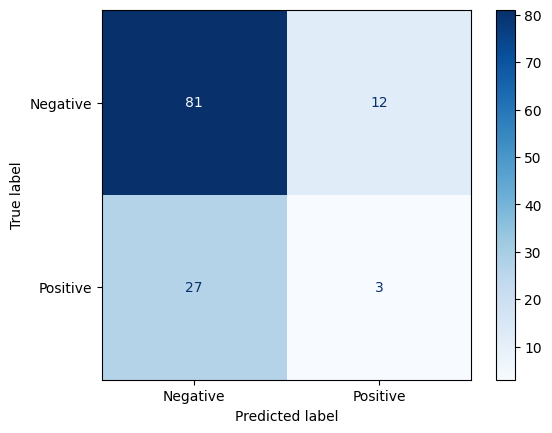

In [77]:
import optuna
from optuna.samplers import TPESampler
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Set random seed for reproducibility
seed = experiment_seed

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters for SVM
    C = trial.suggest_float("C", 1e-5, 1e2, log=True)  # Regularization strength
    kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly", "sigmoid"])
    gamma = trial.suggest_categorical("gamma", ["scale", "auto"])  # Kernel coefficient
    
    # Initialize SVM with suggested parameters
    model = SVC(C=C, kernel=kernel, gamma=gamma, probability=True, random_state=seed)
    model.fit(X_train, y_train)
    
    # Validate on the validation set
    y_valid_pred = model.predict_proba(X_valid)[:, 1]
    y_valid_pred_binary = (y_valid_pred >= 0.5).astype(int)
    
    # Calculate F1 score on the validation set
    f1 = f1_score(y_valid, y_valid_pred_binary)
    return f1  # Optuna will maximize this score

# Create an Optuna study with a fixed seed
study = optuna.create_study(direction="maximize", sampler=TPESampler(seed=seed))
study.optimize(objective, n_trials=100)

# Best parameters and score
best_params = study.best_params
best_score = study.best_value

print("Best Parameters:", best_params)
print("Best Validation F1 Score:", best_score)

# Evaluate the best model on the test set
best_model = SVC(C=best_params["C"], kernel=best_params["kernel"], gamma=best_params["gamma"], probability=True, random_state=seed)
best_model.fit(X_train, y_train)

y_test_pred = best_model.predict_proba(X_test)[:, 1]
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)

# Test metrics
auc = roc_auc_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred_binary)
f1 = f1_score(y_test, y_test_pred_binary)
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)

print("\nTest Metrics:")
print("ROC AUC:", auc)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# Generate a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")

# Generate a classification report
report = classification_report(y_test, y_test_pred_binary, target_names=["Negative", "Positive"])
print("\nClassification Report:")
print(report)

[I 2024-11-19 21:54:53,912] A new study created in memory with name: no-name-1a6b69d4-0b0c-407a-9370-3fbba5a77309


No overlap Study ID found.
No overlap Sample ID found.


[I 2024-11-19 21:54:56,978] Trial 0 finished with value: 0.5878006051919096 and parameters: {'threshold': '0.5*mean', 'max_features': 545, 'norm_order': 1, 'n_estimators': 286, 'max_depth': 21, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.5878006051919096.
[I 2024-11-19 21:54:59,799] Trial 1 finished with value: 0.5860101637492942 and parameters: {'threshold': '1.5*mean', 'max_features': 247, 'norm_order': 2, 'n_estimators': 236, 'max_depth': 17, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.5878006051919096.
[I 2024-11-19 21:55:02,526] Trial 2 finished with value: 0.34599832915622386 and parameters: {'threshold': 'median', 'max_features': 960, 'norm_order': 2, 'n_estimators': 191, 'max_depth': 26, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.5878006051919096.
[I 2024-11-19 21:55:05,213] Trial 3 finished with value: 0.4392496392496392 and parameters: {'threshold': '1.5*mean', 'max_features

Best Parameters: {'threshold': 'median', 'max_features': 30, 'norm_order': 2, 'n_estimators': 112, 'max_depth': 27, 'min_samples_split': 5, 'min_samples_leaf': 1}

Test Metrics:
ROC AUC: 0.8903225806451612
Accuracy: 0.8130081300813008
F1 Score: 0.3783783783783784
Confusion Matrix:
[[93  0]
 [23  7]]


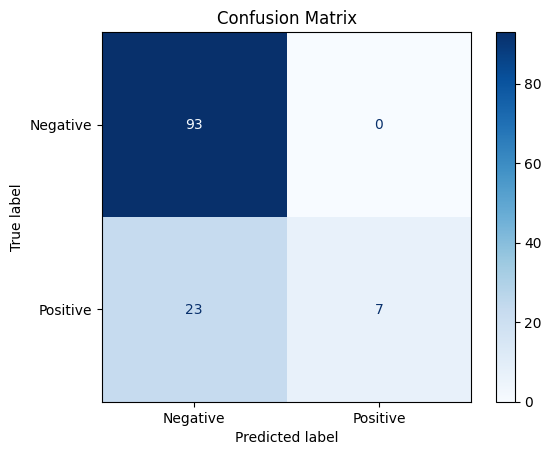


Classification Report:
              precision    recall  f1-score   support

    Negative       0.80      1.00      0.89        93
    Positive       1.00      0.23      0.38        30

    accuracy                           0.81       123
   macro avg       0.90      0.62      0.63       123
weighted avg       0.85      0.81      0.77       123



In [123]:
import optuna
from optuna.samplers import TPESampler
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, f1_score, accuracy_score, confusion_matrix,
    classification_report, ConfusionMatrixDisplay
)
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from copy import deepcopy

# Constants
seed = experiment_seed  # Replace with your experiment seed
gpu_device = 'hist'
test_size = 0.24

# Function to preprocess data
def preprocess_data(df, columns_to_drop, test_size, seed):
    """Splits the data into training and testing datasets and returns feature columns."""
    study_labels = df.groupby("study_id")["Alzheimers"].max().reset_index()
    train_ids, test_ids = train_test_split(
        study_labels["study_id"],
        test_size=test_size,
        stratify=study_labels["Alzheimers"],
        random_state=seed,
    )
    train_data = df[df["study_id"].isin(train_ids)]
    test_data = df[df["study_id"].isin(test_ids)]
    feature_columns = [col for col in df.columns if col not in columns_to_drop]
    
    # Check for overlaps
    check_for_overlap(train_data, test_data)
    
    return train_data, test_data, feature_columns

# Function to compute class weights
def compute_weights(y_train):
    """Computes the class weights for balancing the dataset."""
    class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
    scale_pos_weight = class_weights[1] / class_weights[0]
    return scale_pos_weight

# Function to check for overlaps between train and test data
def check_for_overlap(train_data, test_data):
    """
    Checks for overlapping Sample ID and study_id between train and test datasets.
    """
    # Check for overlapping Study IDs
    overlap_study_ids = set(train_data["study_id"]) & set(test_data["study_id"])
    if overlap_study_ids:
        print(f"Overlap Study ID found: {overlap_study_ids}")
    else:
        print("No overlap Study ID found.")

    # Check for overlapping Sample IDs
    overlap_sample_ids = set(train_data["Sample ID"]) & set(test_data["Sample ID"])
    if overlap_sample_ids:
        print(f"Overlap Sample ID found: {overlap_sample_ids}")
    else:
        print("No overlap Sample ID found.")

# Define the Optuna Objective Function with RandomForest
def objective_with_random_forest(trial, X_train, y_train, seed):
    # Feature selection parameters
    threshold = trial.suggest_categorical('threshold', ['median', 'mean', '0.5*mean', '1.5*mean', 'very_low'])
    max_features = trial.suggest_int('max_features', 1, X_train.shape[1])
    norm_order = trial.suggest_int('norm_order', 1, 2)
    threshold_value = -1e10 if threshold == 'very_low' else threshold

    # RandomForest parameters
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 3, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)

    # StratifiedKFold for 5-fold cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    f1_scores = []

    for train_idx, val_idx in skf.split(X_train, y_train):
        # Train-validation split for this fold
        X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
        y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

        # Feature selection using SelectFromModel with XGBoost
        selector = SelectFromModel(
            estimator=XGBClassifier(
                objective='binary:logistic',
                eval_metric='logloss',
                random_state=seed,
                tree_method='hist'
            ),
            threshold=threshold_value,
            max_features=max_features,
            norm_order=norm_order
        )
        selector.fit(X_train_fold, y_train_fold)
        X_train_selected = selector.transform(X_train_fold)
        X_val_selected = selector.transform(X_val_fold)

        # Train RandomForest with suggested hyperparameters
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=seed
        )
        model.fit(X_train_selected, y_train_fold)

        # Predict on validation data
        y_val_pred = model.predict_proba(X_val_selected)[:, 1]
        y_val_pred_binary = (y_val_pred >= 0.5).astype(int)

        # Compute F1 score for this fold
        f1_scores.append(f1_score(y_val_fold, y_val_pred_binary))

    # Return mean F1 score across folds
    return np.mean(f1_scores)

# Main Program
columns_to_drop = ["Sample ID", "study_id", "Alzheimers", "Date Sample"]
train_data, test_data, feature_columns = preprocess_data(clinical_microbiome_df, columns_to_drop, test_size, seed)
X_train = deepcopy(train_data[feature_columns].values)
y_train = np.array(train_data["Alzheimers"].values)
X_test = deepcopy(test_data[feature_columns].values)
y_test = np.array(test_data["Alzheimers"].values)

# Run Optuna Optimization with RandomForest
study = optuna.create_study(direction="maximize", sampler=TPESampler(seed=seed))
study.optimize(lambda trial: objective_with_random_forest(trial, X_train, y_train, seed), n_trials=100)

# Best Parameters
best_params = study.best_params
print("Best Parameters:", best_params)

# Final Feature Selection using SelectFromModel with XGBoost
final_selector = SelectFromModel(
    estimator=XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=seed,
        tree_method='hist'
    ),
    threshold=-1e10 if best_params['threshold'] == 'very_low' else best_params['threshold'],
    max_features=best_params['max_features'],
    norm_order=best_params['norm_order']
)
final_selector.fit(X_train, y_train)
X_train_selected = final_selector.transform(X_train)
X_test_selected = final_selector.transform(X_test)

# Train Final RandomForest Model
final_model = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    random_state=seed
)
final_model.fit(X_train_selected, y_train)

# Predict on Test Data
y_test_pred = final_model.predict_proba(X_test_selected)[:, 1]
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)

# Evaluate Model Performance
auc = roc_auc_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred_binary)
f1 = f1_score(y_test, y_test_pred_binary)
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)

print("\nTest Metrics:")
print(f"ROC AUC: {auc}\nAccuracy: {accuracy}\nF1 Score: {f1}\nConfusion Matrix:\n{conf_matrix}")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
report = classification_report(y_test, y_test_pred_binary, target_names=["Negative", "Positive"])
print("\nClassification Report:")
print(report)

In [95]:
def check_overlap(train_ids, test_ids):
    """
    Checks for overlapping IDs between train_ids and test_ids.
    
    Args:
        train_ids (list): List of training IDs.
        test_ids (list): List of testing IDs.
    
    Returns:
        set: A set of overlapping IDs, if any.
    """
    # Convert lists to sets for efficient comparison
    train_set = set(train_ids)
    test_set = set(test_ids)
    
    # Find intersection
    overlap = train_set & test_set
    
    return overlap

overlap = check_overlap(train_ids, test_ids)
if overlap:
    print(f"Overlap found: {overlap}")
else:
    print("No overlap found.")

No overlap found.


In [96]:
overlap = check_overlap(train_data['Sample ID'], test_data['Sample ID'])
if overlap:
    print(f"Overlap found: {overlap}")
else:
    print("No overlap found.")

No overlap found.


Number of selected features: 16


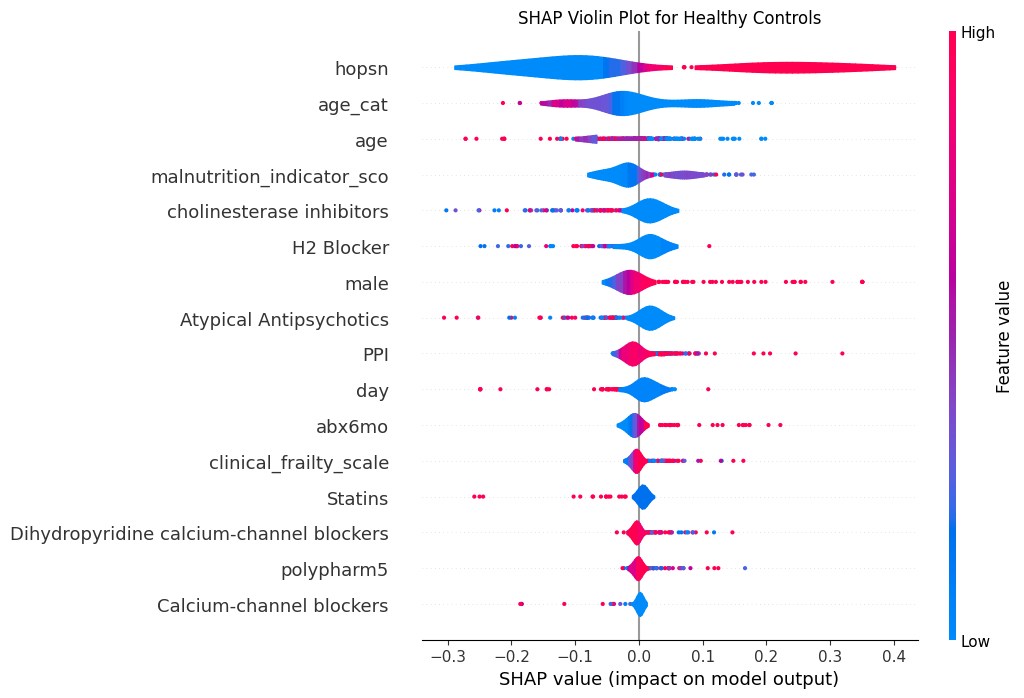

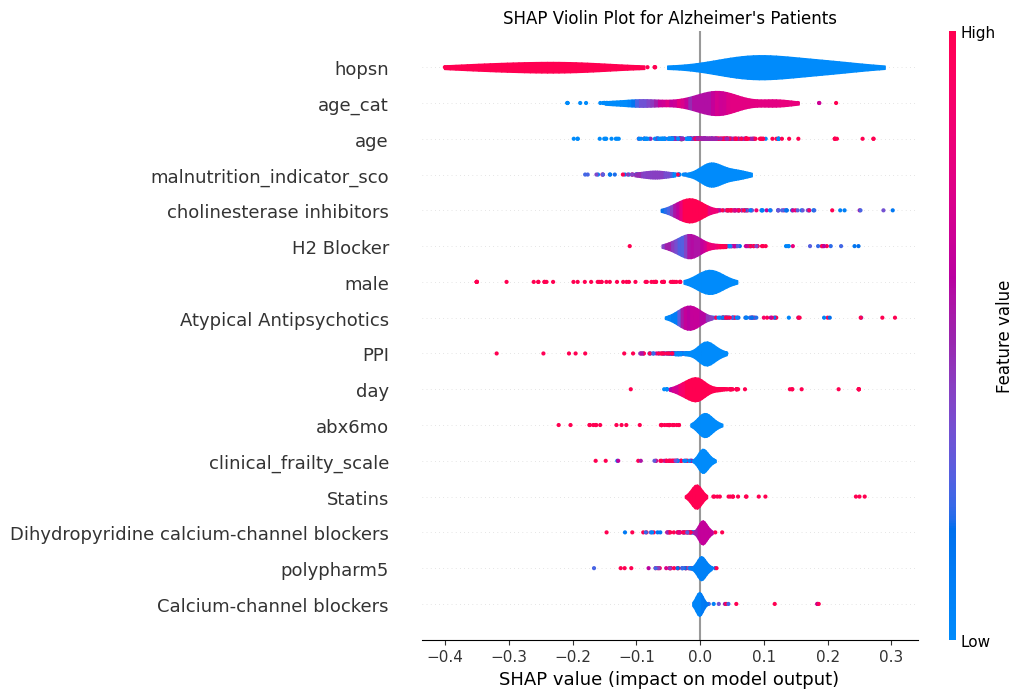

In [122]:
import shap
import matplotlib.pyplot as plt
selected_feature_names = [feature_columns[i] for i in range(X_train_selected.shape[1])]
print(f"Number of selected features: {len(selected_feature_names)}")
# Step 1: Initialize SHAP explainer
explainer = shap.Explainer(final_model, X_train_selected)

# Step 2: Compute SHAP values
shap_values = explainer(X_train_selected, check_additivity=False)

# Step 3: Extract SHAP values for each class
shap_values_class_0 = shap.Explanation(
    shap_values[:, :, 0],  # SHAP values for Class 0 (Negative)
    feature_names=selected_feature_names
)
shap_values_class_1 = shap.Explanation(
    shap_values[:, :, 1],  # SHAP values for Class 1 (Positive)
    feature_names=selected_feature_names
)

# Violin plot for Class 0
plt.figure(figsize=(10, 6))
plt.title("SHAP Violin Plot for Healthy Controls")
shap.plots.violin(shap_values_class_0, max_display=20)
plt.show()

# Violin plot for Class 1
plt.figure(figsize=(10, 6))
plt.title("SHAP Violin Plot for Alzheimer's Patients")
shap.plots.violin(shap_values_class_1, max_display=20)
plt.show()

Plotting aggregated global feature importance...


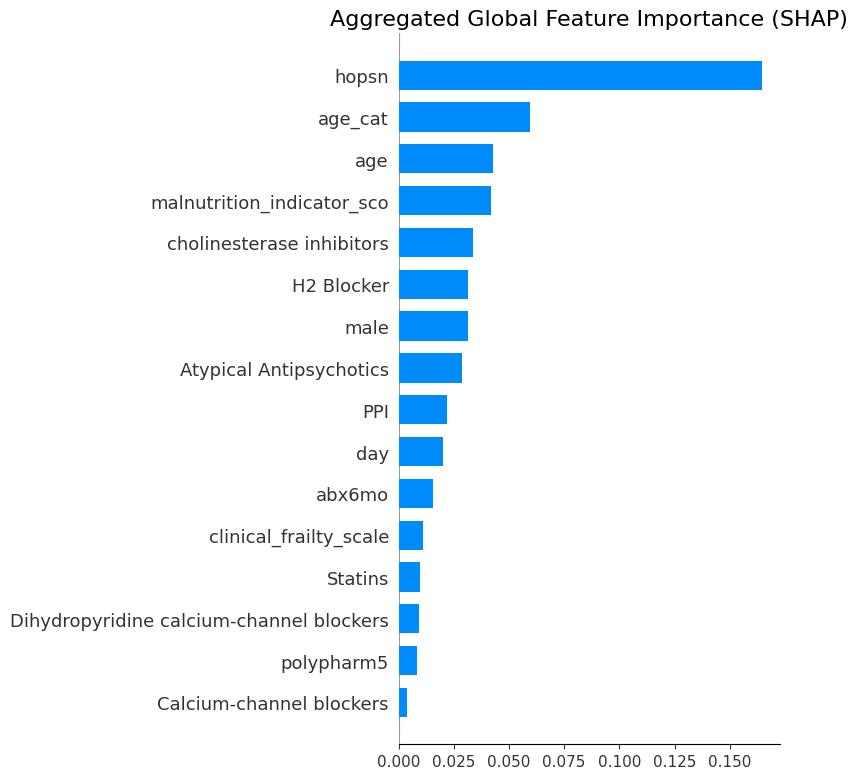

Plotting global feature importance for Class 0...


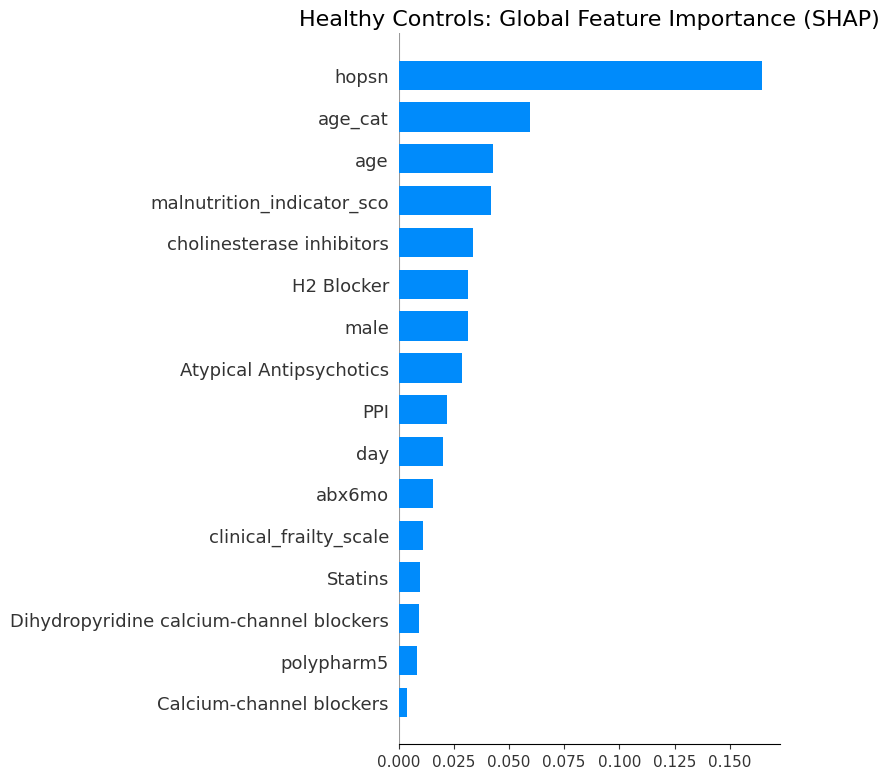

Plotting global feature importance for Class 1...


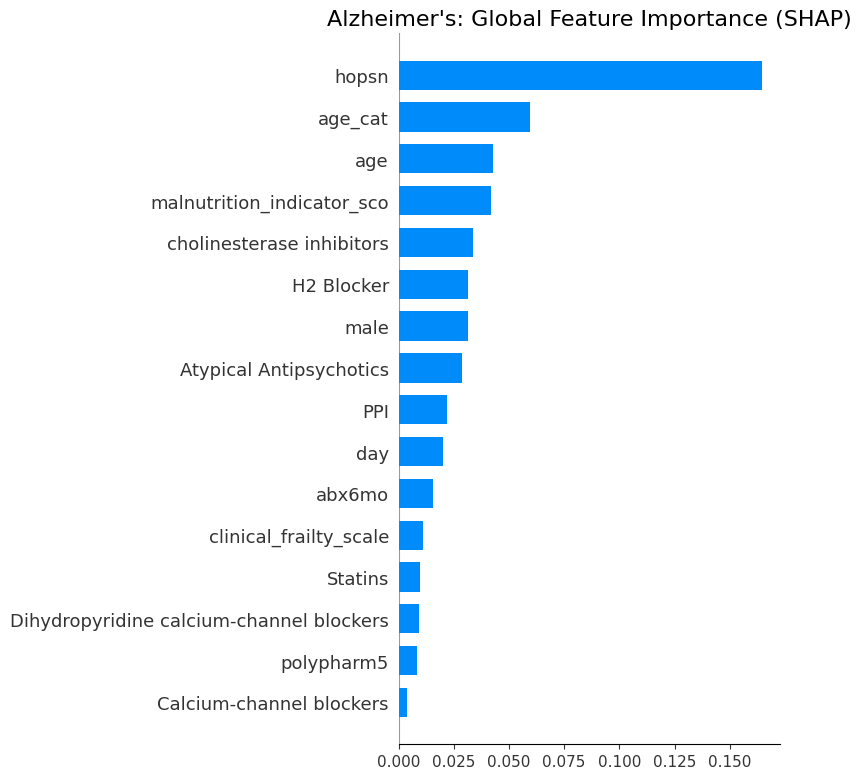

In [121]:
def plot_shap_summary(shap_values, X, feature_names, title=None, figsize=(10, 10)):
    """
    Plots a SHAP summary plot with a consistent size and customized title.
    
    Args:
        shap_values: SHAP values to plot.
        X: Input features corresponding to SHAP values.
        feature_names: List of feature names.
        title: Optional; title for the plot.
        figsize: Tuple; size of the plot (consistent across plots).
    """
    # Create the SHAP plot but prevent it from displaying automatically
    plt.figure(figsize=figsize)
    shap.summary_plot(
        shap_values,
        X,
        feature_names=feature_names,
        plot_type="bar",
        show=False  # Prevent SHAP from displaying immediately
    )
    
    # Ensure consistent layout by fixing the current figure and axes
    ax = plt.gca()
    
    # Remove the default x-axis label added by SHAP
    ax.set_xlabel("")
    
    # Add a custom title if provided
    if title:
        plt.title(title, fontsize=16)
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


# Aggregate SHAP values across all classes using the mean absolute value
shap_values_aggregated = np.abs(shap_values.values).mean(axis=2)  # Aggregate across classes
print("Plotting aggregated global feature importance...")
plot_shap_summary(
    shap_values=shap_values_aggregated,
    X=X_train_selected,
    feature_names=selected_feature_names,
    title="Aggregated Global Feature Importance (SHAP)",
    figsize=(12, 12)  # Ensure consistent size
)

# Plot SHAP values for Class 0 (e.g., Healthy Controls)
shap_values_class_0 = shap_values.values[:, :, 0]  # SHAP values for Class 0
print("Plotting global feature importance for Class 0...")
plot_shap_summary(
    shap_values=shap_values_class_0,
    X=X_train_selected,
    feature_names=selected_feature_names,
    title="Healthy Controls: Global Feature Importance (SHAP)",
    figsize=(12, 12)  # Ensure consistent size
)

# Plot SHAP values for Class 1 (e.g., Alzheimer's Patients)
shap_values_class_1 = shap_values.values[:, :, 1]  # SHAP values for Class 1
print("Plotting global feature importance for Class 1...")
plot_shap_summary(
    shap_values=shap_values_class_1,
    X=X_train_selected,
    feature_names=selected_feature_names,
    title="Alzheimer's: Global Feature Importance (SHAP)",
    figsize=(12, 12)  # Ensure consistent size
)

[I 2024-11-19 20:31:49,892] A new study created in memory with name: no-name-a599a1ff-8cac-45af-91ef-17aa18802c0e
[I 2024-11-19 20:31:50,275] Trial 0 finished with value: 0.7439723699358589 and parameters: {'threshold': '0.5*mean', 'max_features': 545, 'norm_order': 1, 'learning_rate': 0.47174117814749944, 'max_depth': 21, 'min_child_weight': 9, 'subsample': 0.9790645045608661, 'colsample_bytree': 0.5750336561222549, 'gamma': 5.137921379683804, 'reg_alpha': 1.8324610912417527, 'reg_lambda': 6.734878346131648, 'n_estimators': 67}. Best is trial 0 with value: 0.7439723699358589.
[I 2024-11-19 20:31:50,832] Trial 1 finished with value: 0.7353604961667671 and parameters: {'threshold': 'mean', 'max_features': 849, 'norm_order': 2, 'learning_rate': 0.0763033929576656, 'max_depth': 27, 'min_child_weight': 4, 'subsample': 0.8002840784342384, 'colsample_bytree': 0.9188071017141408, 'gamma': 5.32247848401019, 'reg_alpha': 5.656795048483755, 'reg_lambda': 8.512715264348747, 'n_estimators': 133}. 

Best Parameters: {'threshold': 'mean', 'max_features': 125, 'norm_order': 1, 'learning_rate': 0.12387207586608953, 'max_depth': 28, 'min_child_weight': 2, 'subsample': 0.8346283441396214, 'colsample_bytree': 0.9552020804593704, 'gamma': 0.039316223534621074, 'reg_alpha': 1.996334561419255, 'reg_lambda': 5.20016704593537, 'n_estimators': 177}

Test Metrics:
ROC AUC: 0.921505376344086
Accuracy: 0.8292682926829268
F1 Score: 0.5333333333333333
Confusion Matrix:
[[90  3]
 [18 12]]


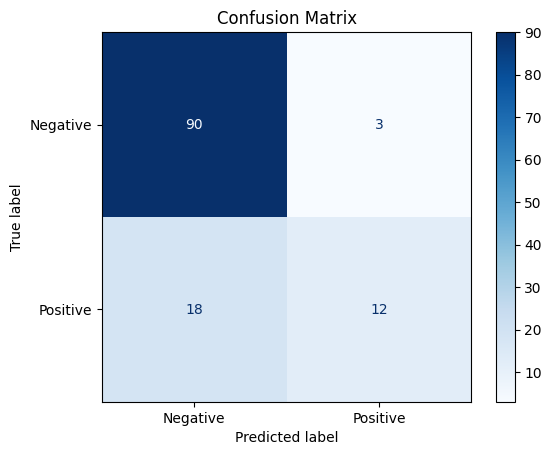


Classification Report:
              precision    recall  f1-score   support

    Negative       0.83      0.97      0.90        93
    Positive       0.80      0.40      0.53        30

    accuracy                           0.83       123
   macro avg       0.82      0.68      0.71       123
weighted avg       0.83      0.83      0.81       123



In [91]:
import optuna
from optuna.samplers import TPESampler
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import (
    roc_auc_score, f1_score, accuracy_score, confusion_matrix, 
    classification_report, ConfusionMatrixDisplay
)
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.model_selection import train_test_split
from copy import deepcopy


# Constants and Configuration
seed = experiment_seed  # Replace with your experiment seed
test_size = 0.24
gpu_device = "hist"

# Function to preprocess data
def preprocess_data(df, columns_to_drop, test_size, seed):
    study_labels = df.groupby("study_id")["Alzheimers"].max().reset_index()
    train_ids, test_ids = train_test_split(
        study_labels["study_id"],
        test_size=test_size,
        stratify=study_labels["Alzheimers"],
        random_state=seed,
    )
    train_data = df[df["study_id"].isin(train_ids)]
    test_data = df[df["study_id"].isin(test_ids)]
    feature_columns = [col for col in df.columns if col not in columns_to_drop]
    return train_data, test_data, feature_columns

# Function to compute class weights
def compute_weights(y_train):
    class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
    scale_pos_weight = class_weights[1] / class_weights[0]
    return scale_pos_weight

# Define Optuna Objective Function
def objective(trial, X_train, y_train, scale_pos_weight, seed):
    # Feature selection parameters
    threshold = trial.suggest_categorical('threshold', ['median', 'mean', '0.5*mean', '1.5*mean', 'very_low'])
    max_features = trial.suggest_int('max_features', 1, X_train.shape[1])
    norm_order = trial.suggest_int('norm_order', 1, 2)
    threshold_value = -1e10 if threshold == 'very_low' else threshold

    # Feature selection
    selector = SelectFromModel(
        estimator=XGBClassifier(
            objective='binary:logistic',
            eval_metric='logloss',
            random_state=seed,
            tree_method=gpu_device
        ),
        threshold=threshold_value,
        max_features=max_features,
        norm_order=norm_order
    )
    selector.fit(X_train, y_train)
    X_train_selected = selector.transform(X_train)

    # Define XGBoost parameters
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'scale_pos_weight': scale_pos_weight,
        'seed': seed,
        'tree_method': gpu_device,
    }

    # Cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    f1_scores = []
    for train_idx, val_idx in skf.split(X_train_selected, y_train):
        X_train_fold, X_val_fold = X_train_selected[train_idx], X_train_selected[val_idx]
        y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
        dtrain = xgb.DMatrix(X_train_fold, label=y_train_fold)
        dval = xgb.DMatrix(X_val_fold, label=y_val_fold)
        model = xgb.train(
            params=params,
            dtrain=dtrain,
            num_boost_round=trial.suggest_int("n_estimators", 50, 300),
            evals=[(dtrain, 'train'), (dval, 'eval')],
            early_stopping_rounds=50,
            verbose_eval=False
        )
        y_val_pred = model.predict(dval)
        y_val_pred_binary = (y_val_pred >= 0.5).astype(int)
        f1_scores.append(f1_score(y_val_fold, y_val_pred_binary))
    return np.mean(f1_scores)

# Main Program
columns_to_drop = ["Sample ID", "study_id", "Alzheimers", "Date Sample"]
train_data, test_data, feature_columns = preprocess_data(clinical_microbiome_df, columns_to_drop, test_size, seed)
X_train = deepcopy(train_data[feature_columns].values)
y_train = np.array(train_data["Alzheimers"].values)
X_test = deepcopy(test_data[feature_columns].values)
y_test = np.array(test_data["Alzheimers"].values)
scale_pos_weight = compute_weights(y_train)

# Run Optuna Optimization
study = optuna.create_study(direction="maximize", sampler=TPESampler(seed=seed))
study.optimize(lambda trial: objective(trial, X_train, y_train, scale_pos_weight, seed), n_trials=100)

# Best Parameters
best_params = study.best_params
print("Best Parameters:", best_params)

# Apply Final Model
final_selector = SelectFromModel(
    estimator=XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=seed,
        tree_method=gpu_device
    ),
    threshold=-1e10 if best_params['threshold'] == 'very_low' else best_params['threshold'],
    max_features=best_params['max_features'],
    norm_order=best_params['norm_order']
)

final_selector.fit(X_train, y_train)
X_train_selected = final_selector.transform(X_train)
X_test_selected = final_selector.transform(X_test)

# Train Final Model
final_model_params = {
    **{k: v for k, v in best_params.items() if k not in ['threshold', 'norm_order', 'max_features', 'n_estimators']},
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'seed': seed,
    'tree_method': gpu_device
}
dtrain_final = xgb.DMatrix(X_train_selected, label=y_train)
dtest_final = xgb.DMatrix(X_test_selected)

final_model = xgb.train(
    params=final_model_params,
    dtrain=dtrain_final,
    num_boost_round=best_params['n_estimators'],

)

# Predictions and Evaluation
y_test_pred = final_model.predict(dtest_final)
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)
auc = roc_auc_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred_binary)
f1 = f1_score(y_test, y_test_pred_binary)
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
print("\nTest Metrics:")
print(f"ROC AUC: {auc}\nAccuracy: {accuracy}\nF1 Score: {f1}\nConfusion Matrix:\n{conf_matrix}")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
report = classification_report(y_test, y_test_pred_binary, target_names=["Negative", "Positive"])
print("\nClassification Report:")
print(report)


Test Metrics:
ROC AUC: 0.921505376344086
Accuracy: 0.8292682926829268
F1 Score: 0.5333333333333333
Confusion Matrix:
[[90  3]
 [18 12]]


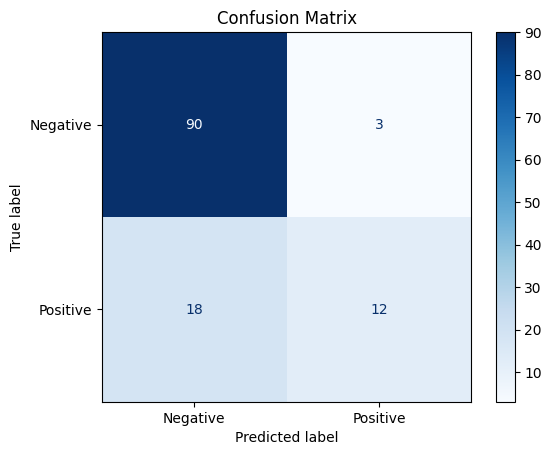


Classification Report:
              precision    recall  f1-score   support

    Negative       0.83      0.97      0.90        93
    Positive       0.80      0.40      0.53        30

    accuracy                           0.83       123
   macro avg       0.82      0.68      0.71       123
weighted avg       0.83      0.83      0.81       123



In [92]:
final_model = xgb.train(
    params=final_model_params,
    dtrain=dtrain_final,
    num_boost_round=best_params['n_estimators'],

)

# Predictions and Evaluation
y_test_pred = final_model.predict(dtest_final)
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)
auc = roc_auc_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred_binary)
f1 = f1_score(y_test, y_test_pred_binary)
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
print("\nTest Metrics:")
print(f"ROC AUC: {auc}\nAccuracy: {accuracy}\nF1 Score: {f1}\nConfusion Matrix:\n{conf_matrix}")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
report = classification_report(y_test, y_test_pred_binary, target_names=["Negative", "Positive"])
print("\nClassification Report:")
print(report)

In [88]:
final_model_params

{'learning_rate': 0.2634843424268896,
 'max_depth': 18,
 'min_child_weight': 1,
 'subsample': 0.8365482225886771,
 'colsample_bytree': 0.5354675788349132,
 'gamma': 4.269583706944988,
 'reg_alpha': 0.3409019569128682,
 'reg_lambda': 0.6610522295612075,
 'objective': 'binary:logistic',
 'eval_metric': 'logloss',
 'seed': 127573839,
 'tree_method': 'hist'}